In [1]:
import json
import numpy as np
import os
dict_path = f"./Saved_Results/NIID_middlebias_10clients"
session_name = f"fedalgo9_ratio_1.0_C_0.3_config4"
saved_path = f"NIID_middlebias_10clients"
path_ = f"{dict_path}/{session_name}.json"

path_ = "/mnt/disk2/ndlong/SampleSelection_easyFL/Saved_Results/NIID_middlebias_10clients/fedalgo7_ratio_1.0_C_0.3_config2.json"
with open(path_, "r") as f:
    result_dict = json.load(f) 

In [2]:
result_dict.keys()

dict_keys(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6', 'Round 7', 'Round 8', 'Round 9', 'Round 10', 'Round 11', 'Round 12', 'Round 13', 'Round 14', 'Round 15', 'Round 16', 'Round 17', 'Round 18', 'Round 19', 'Round 20', 'Round 21', 'Round 22', 'Round 23', 'Round 24', 'Round 25', 'Round 26', 'Round 27', 'Round 28', 'Round 29', 'Round 30', 'Round 31', 'Round 32', 'Round 33', 'Round 34', 'Round 35', 'Round 36', 'Round 37', 'Round 38', 'Round 39', 'Round 40', 'Round 41', 'Round 42', 'Round 43', 'Round 44', 'Round 45', 'Round 46', 'Round 47', 'Round 48', 'Round 49', 'Round 50', 'Round 51', 'Round 52', 'Round 53', 'Round 54', 'Round 55', 'Round 56', 'Round 57', 'Round 58', 'Round 59', 'Round 60', 'Round 61', 'Round 62', 'Round 63', 'Round 64', 'Round 65', 'Round 66', 'Round 67', 'Round 68', 'Round 69', 'Round 70', 'Round 71', 'Round 72', 'Round 73', 'Round 74', 'Round 75', 'Round 76', 'Round 77', 'Round 78', 'Round 79', 'Round 80', 'Round 81', 'Round 82', 'Round 83', 'R

In [75]:
client_id = 6

for client_id in range(10):
    list_score = []
    list_round = []
    for round in range(1,147):
        round_information = result_dict[f"Round {round}"]
        if client_id not in round_information["selectd_client"]:
            continue
        else:
            client_information = round_information["score_list"][f"client_{client_id}"]
            list_score.append(client_information)
            list_round.append(round)
        
    
    def check_dir(dict_path):
        if not os.path.exists(dict_path):
            os.makedirs(dict_path)
            
    import math
    import matplotlib.pyplot as plt
    n_cols = 6
    n_rows = math.ceil(len(list_round)/n_cols)

    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20,5 * n_rows), sharex=True,sharey=True)
    for i in range(len(list_round)):
        row = i // n_cols
        col = i % n_cols
        ax[row,col].bar(range(len(list_score[i])),list_score[i])
        # ax[row,col].set_xticklabels(my_dict.keys())
        ax[row,col].set(xlabel=f"Round {list_round[i]}")
    check_dir(f"Fig/{saved_path}/{session_name}/Sample")
    plt.savefig(f"Fig/{saved_path}/{session_name}/Sample/Client {client_id}")
    plt.clf()
    # len(list_round)

<Figure size 1440x2520 with 0 Axes>

<Figure size 1440x2520 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x3240 with 0 Axes>

<Figure size 1440x3240 with 0 Axes>

<Figure size 1440x2520 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2520 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

In [ ]:
def MSE(a,b):
    

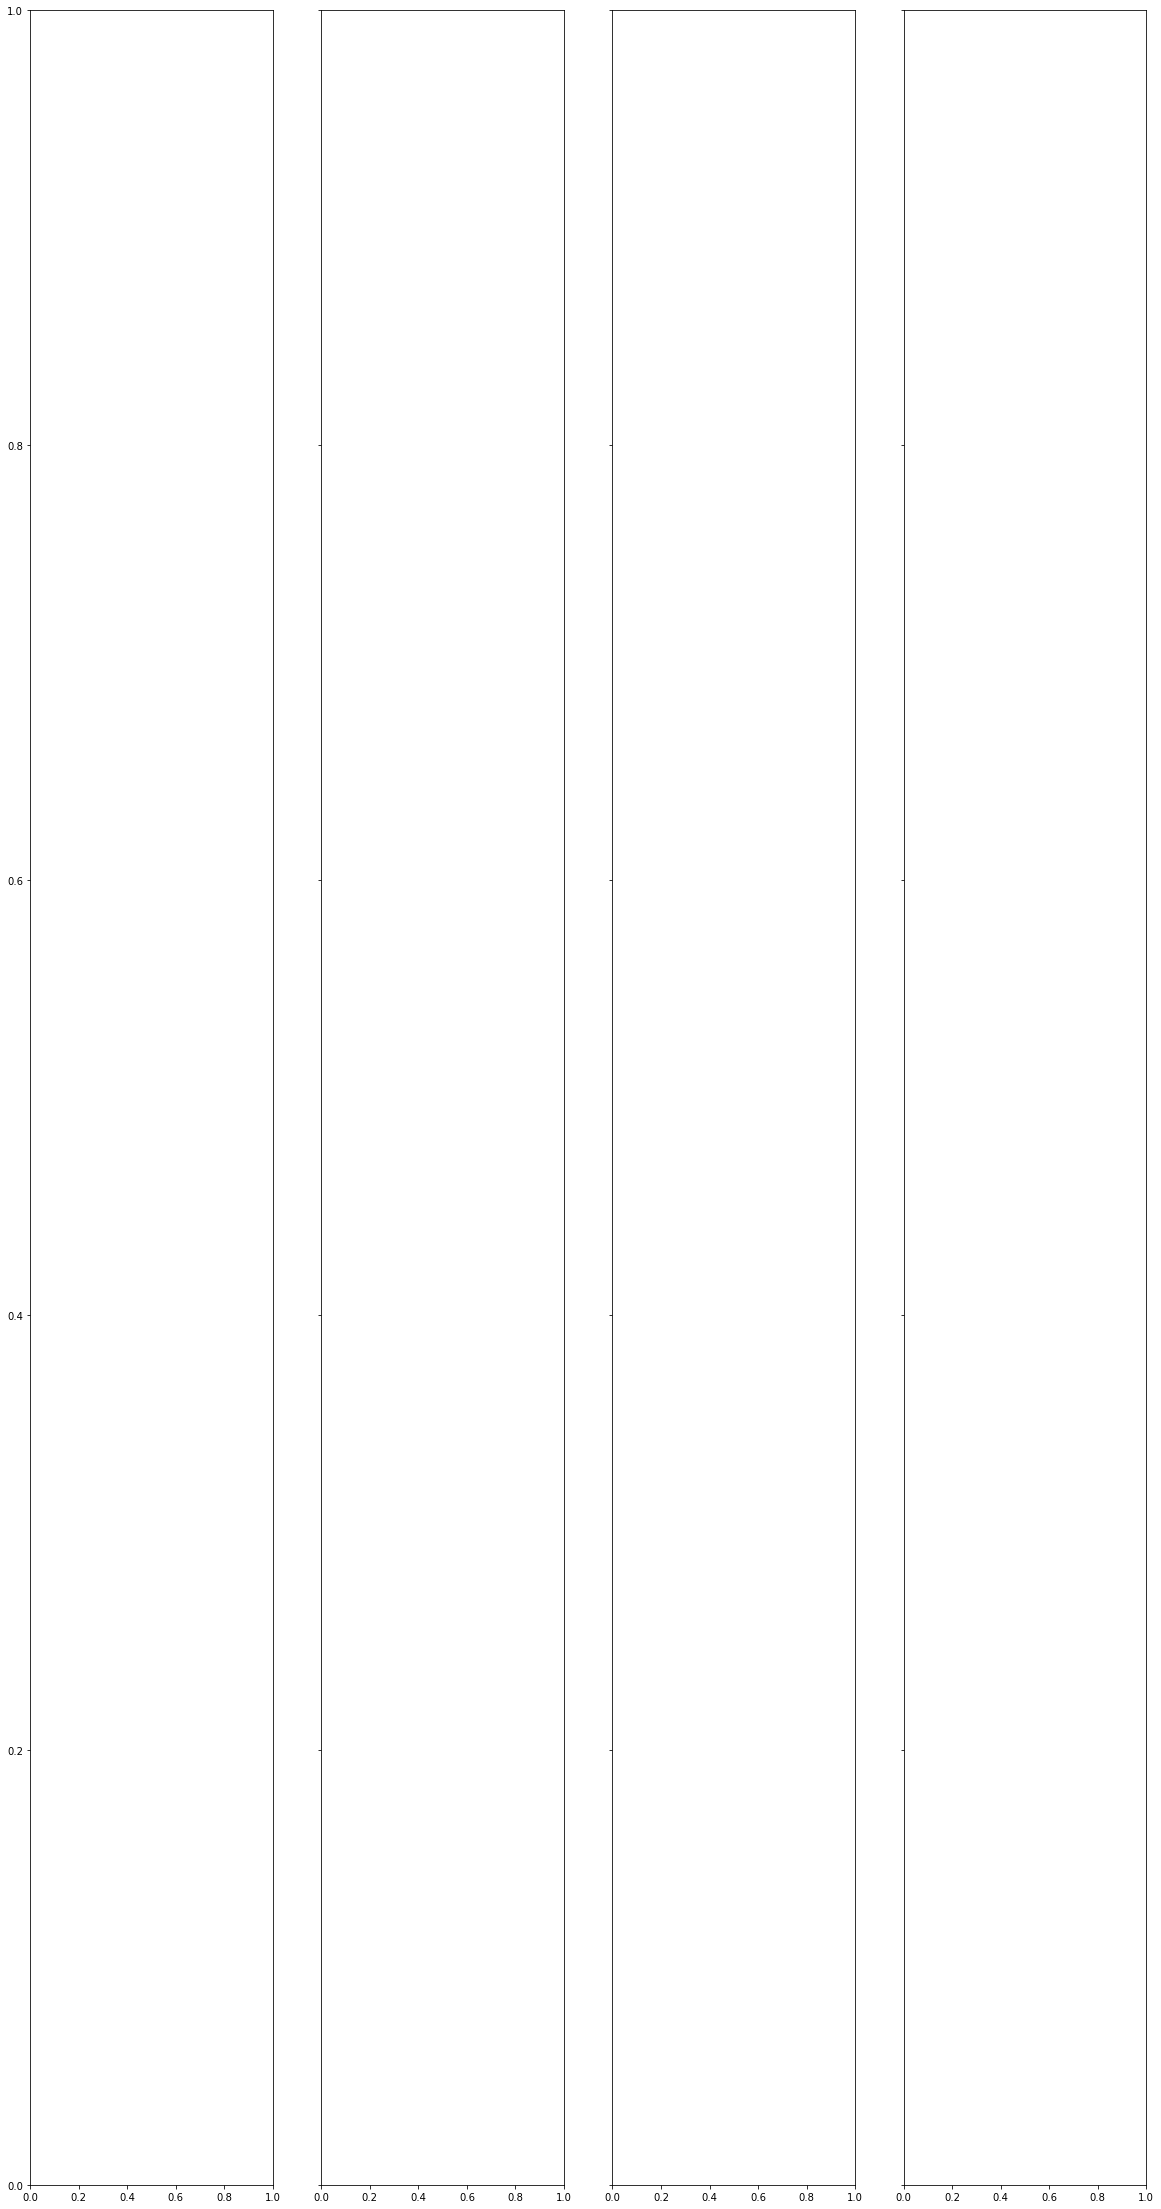

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5 * n_rows), sharex=True,sharey=True)

In [31]:
ax[3]

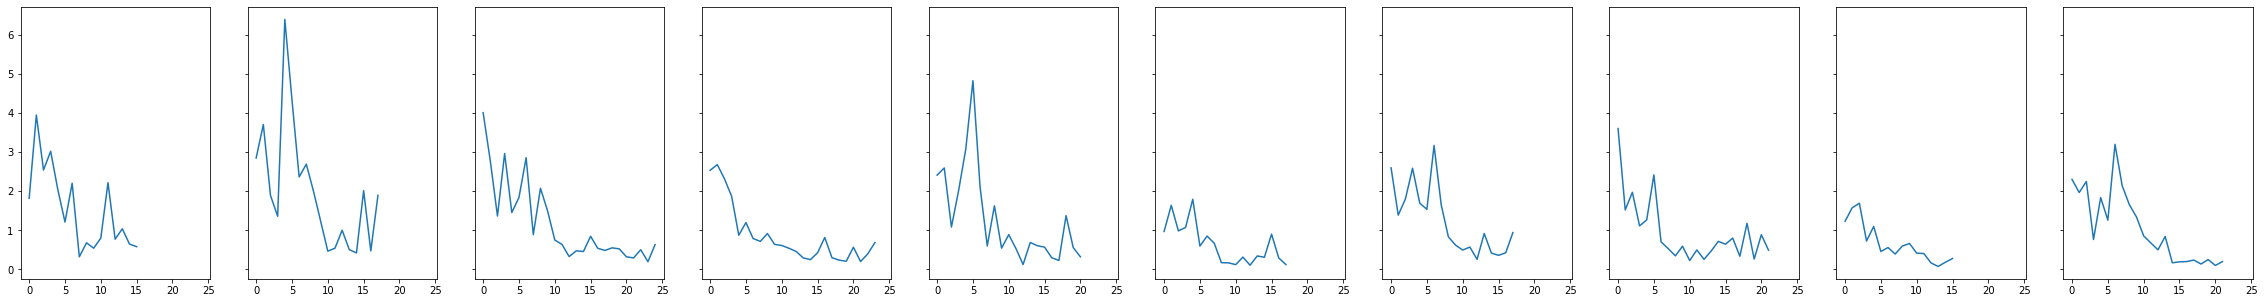

In [78]:
from sklearn.metrics import mean_squared_error, median_absolute_error,mean_absolute_error,r2_score
list_client = range(10)
list_std = []
fig, ax = plt.subplots(nrows=1, ncols=len(list_client),figsize=(4 * len(list_client),5), sharex=True,sharey=True)
for id, client_id in enumerate(list_client):
    list_score = []
    list_round = []
    for round in range(40,140):
        round_information = result_dict[f"Round {round}"]
        if client_id not in round_information["selectd_client"]:
            continue
        else:
            client_information = round_information["score_list"][f"client_{client_id}"]
            list_score.append(client_information)
            list_round.append(round)
        
    list_mse = []
    for i in range(len(list_score) - 1):
    
        diff_round = list_round[i+1] - list_round[i]
        # diff_
        
        # mse = mean_absolute_error(list_score[i], list_score[i+1]) / diff_round
        # mse = mean_absolute_error(list_score[i], list_score[i+1]) 
        mse = median_absolute_error(list_score[i], list_score[i+1]) / diff_round
        if diff_round > 1:
            list_mse.append(mse)
    ax[id].plot(range(len(list_mse)), list_mse)

In [ ]:
client_id = 6
list_score = []
list_round = []
for round in range(1,147):
    round_information = result_dict[f"Round {round}"]
    if client_id not in round_information["selectd_client"]:
        continue
    else:
        client_information = round_information["score_list"][f"client_{client_id}"]
        list_score.append(client_information)
        list_round.append(round)
    
list_mse = []
for i in range(len(list_score) - 1):
    diff_round = list_round[i+1] - list_round[i]
    # diff_
    mse = mean_squared_error(list_score[i], list_score[i+1]) / (2**(diff_round -1 ))
    list_mse.append(mse)
plt.plot(range(len(list_mse)), list_mse)

In [18]:
diff_round = list_round[i+1] - list_score[i]

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [21]:
i

0

In [20]:
list_round[1] - 

5

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(list_score[0], list_score[1])
mse

55.793250634169766

<BarContainer object of 575 artists>

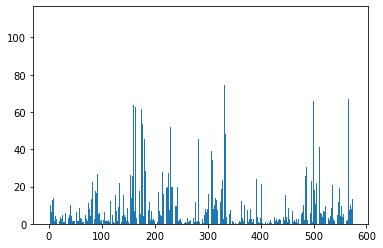

In [9]:

plt.bar(range(len(client_information)),client_information)